In [2]:
from skimage.morphology import square
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
X=np.array([[i] for i in range(1,11)])
print(X.ravel())

[ 1  2  3  4  5  6  7  8  9 10]


In [4]:
y=np.array([i*2 for i in range(1,11)])
print(y)

[ 2  4  6  8 10 12 14 16 18 20]


In [5]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
#print(X_train.ravel())

In [6]:
#print(X_test.ravel())

In [7]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
X_train.ravel()

array([ 1,  8,  3, 10,  5,  4,  7])

In [8]:
X_val.ravel()

array([6])

In [9]:
X_test.ravel()

array([9, 2])

In [10]:
import pandas as pd

In [11]:
data=pd.DataFrame({
    "Площадь":[30,45,80,75,90,105,135,150,165,180],
    "Этаж":[2,3,5,1,8,10,12,15,17,20],
    "Цена":[3.5,5.2,6.8,7.1,9.3,10.6,12.7,14.2,15.8,17.5]
})
X=data[["Площадь","Этаж"]]
y=data["Цена"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)

   Площадь  Этаж
5      105    10
0       30     2
7      150    15
2       80     5
9      180    20
4       90     8
3       75     1
6      135    12


In [12]:
print(X_test)

   Площадь  Этаж
8      165    17
1       45     3


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
train_predictions=model.predict(X_train)
test_predictions=model.predict(X_test)
print(train_predictions)

[10.2965852   3.50520786 14.40129054  7.68420512 17.38675194  8.87855185
  6.713545   12.83386249]


In [16]:
print(test_predictions)

[15.81932389  4.77384651]


In [20]:
train_mae=mean_absolute_error(y_train,train_predictions)
print(f"Ошибка на обучающей выборке: {train_mae:.2f}")


Ошибка на обучающей выборке: 0.31


In [18]:
test_mae=mean_absolute_error(y_test,test_predictions)
print(f"Ошибка на тестовой выборке: {test_mae:.2f}")

Ошибка на тестовой выборке: 0.22


In [26]:
new_dep=pd.DataFrame({
    "Площадь":[60],
    "Этаж":[4]
})
new_predict=model.predict(new_dep)
print(new_predict[0])
print(f"Цена квартиры 60 кв.м на 4 этаже: {new_predict[0]:.3f}")

6.042485153037917
Цена квартиры 60 кв.м на 4 этаже: 6.042


In [27]:
print(f"Размер обучающей выборки:{X_train.shape[0]}")

Размер обучающей выборки:8


In [30]:
print(f"Размер тестовой выборки:{X_test.shape[0]}")

Размер тестовой выборки:2


In [31]:
print("Коэффициент модели:",model.coef_)


Коэффициент модели: [0.07461626 0.1493947 ]


In [32]:
print("Свободный член (intercept):", model.intercept_)

Свободный член (intercept): 0.9679305619004115


In [33]:
y_pred=model.predict(X_test)
print("Реальные цены:", y_test.values)


Реальные цены: [15.8  5.2]


In [34]:
print("Предсказанные цены:", y_pred)

Предсказанные цены: [15.81932389  4.77384651]


In [35]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f} млн рублей")

Средняя абсолютная ошибка (MAE): 0.22 млн рублей


In [38]:
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Среднеквадратичная ошибка (MSE): 0.09


In [39]:
import matplotlib.pyplot as plt

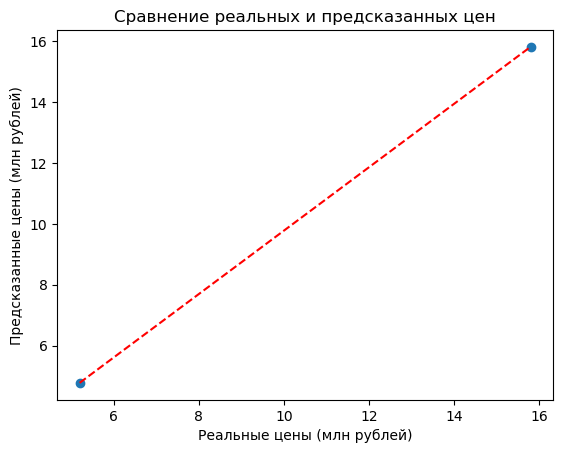

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel("Реальные цены (млн рублей)")
plt.ylabel("Предсказанные цены (млн рублей)")
plt.title("Сравнение реальных и предсказанных цен")
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red',linestyle='--')
plt.show()

In [45]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f} млн рублей")

Корень из среднеквадратичной ошибки (RMSE): 0.30 млн рублей


In [48]:
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Коэффициент детерминации (R²): 1.00
